# OSM API Python

Trying out this example (https://pygis.io/docs/d_access_osm.html) to get querying OSM given a polygon.

In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import numpy as np
import time
import pandas as pd
from tqdm import tqdm

place_name = "Edgewood Washington, DC, USA"

# get place boundary related to the place name as a gdf
area = ox.geocode_to_gdf(place_name)
print(area.geometry)

0    POLYGON ((-77.00892 38.92123, -77.00890 38.920...
Name: geometry, dtype: geometry


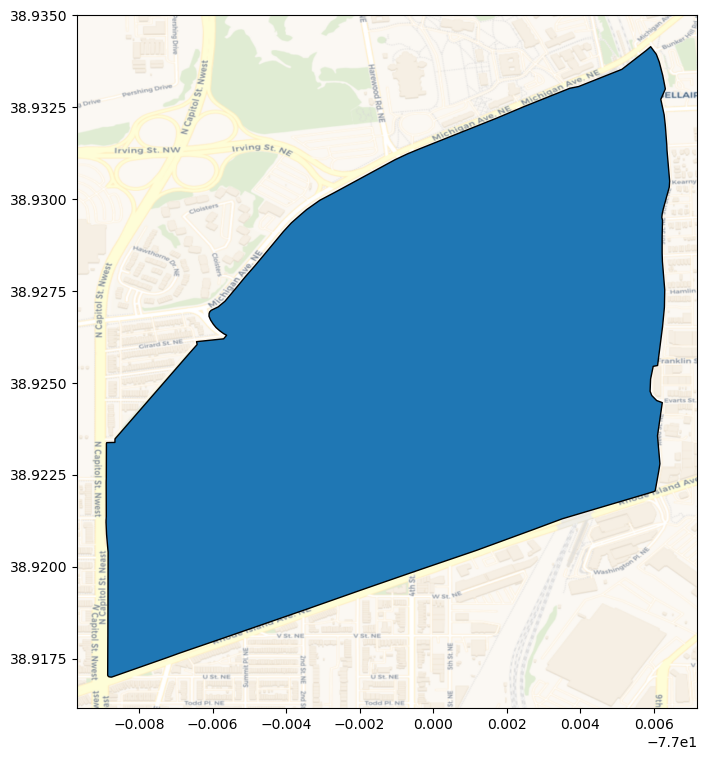

In [2]:
fig, ax = plt.subplots(1,1,figsize=(8,10))


area.plot(ax=ax, edgecolor='black')
cx.add_basemap(ax, crs='EPSG:4326', attribution=False, source=cx.providers.CartoDB.Voyager)

plt.show()

<Axes: >

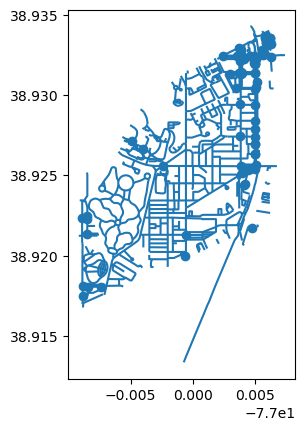

In [3]:
tags = {'highway': True}

roads = ox.features_from_place(place_name, tags)
roads.head()
roads.plot()

EPSG:4326


<Axes: >

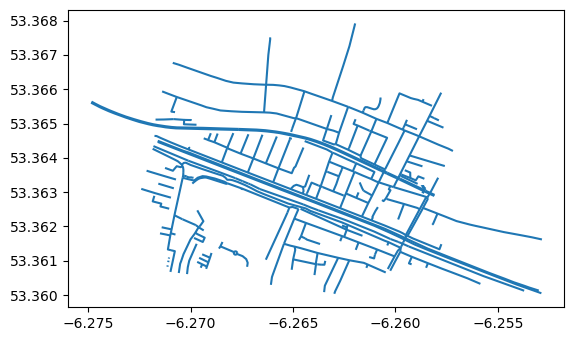

In [4]:
poly = gpd.read_file("polygons/whitworth.geojson")#.to_crs(3857).buffer(3000,join_style=2).to_crs(4326))

print(poly.crs)
north = poly.total_bounds[3]
south = poly.total_bounds[1]
east = poly.total_bounds[2]
west = poly.total_bounds[0]

tags = {"highway" : True, "railway" : True, "waterway" : True}
ways = ox.features_from_bbox(north, south, east, west, tags)
ways = ways.loc[ways.geometry.type=='LineString']
ways = ways.loc[ways.highway!="footway"]
ways.plot()


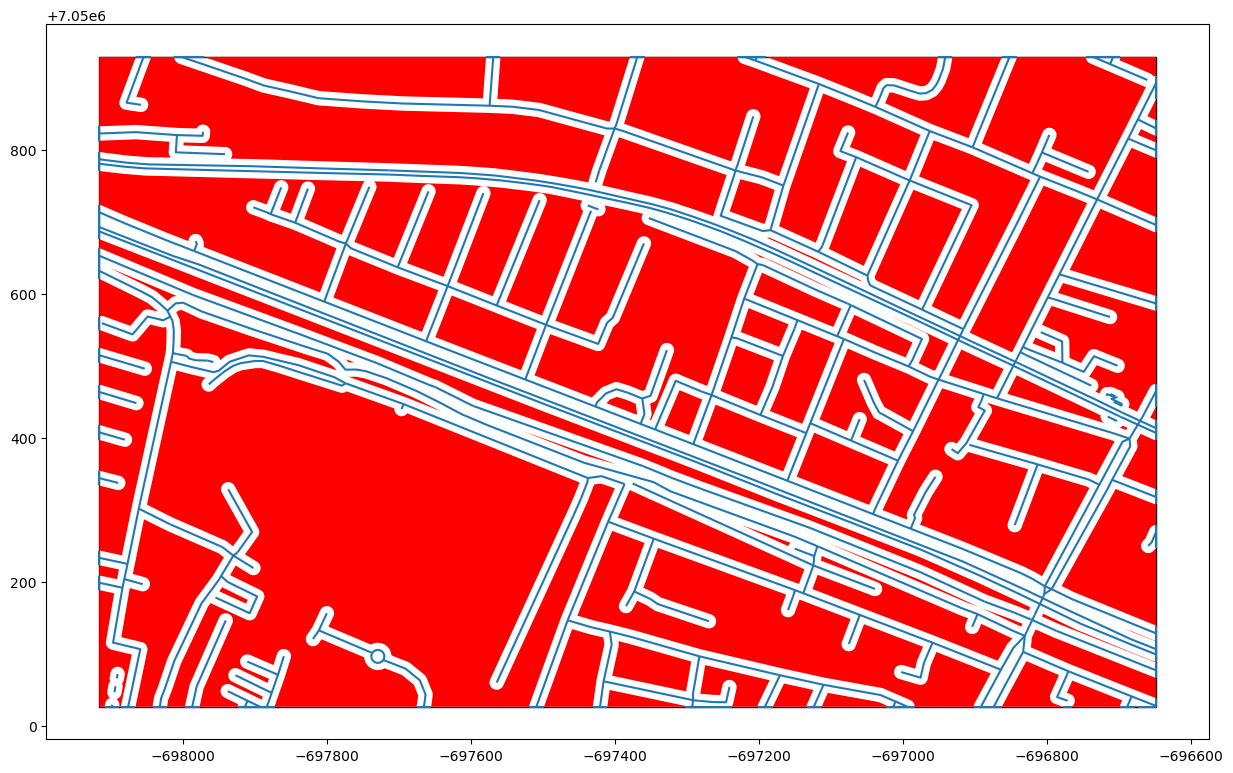

In [5]:
poly = poly.to_crs(3857)
ways = ways.to_crs(3857)

ways_clip = gpd.clip(ways, poly)

ways_buffer = gpd.GeoDataFrame(geometry=ways_clip.buffer(10))

ways_poly = poly.overlay(ways_buffer, how='symmetric_difference')
ways_poly = gpd.clip(ways_poly, poly)
#ways_poly = poly.symmetric_difference(ways_buffer)

fig, ax = plt.subplots(1,1,figsize=(15,10))

poly.plot(ax=ax, edgecolor='black', facecolor='none')
#cx.add_basemap(ax, crs='EPSG:3857', attribution=False, source=cx.providers.CartoDB.Voyager)

#ways_buffer.plot(ax=ax, facecolor='pink')
ways_clip.plot(ax=ax)
ways_poly.plot(ax=ax, facecolor='red')
plt.show()

# this took 6 minutes to run

                                             geometry
35  LINESTRING (-697023.833 7050026.380, -697003.0...
7   LINESTRING (-697019.071 7050026.380, -696984.1...
1   LINESTRING (-697134.354 7050026.380, -697113.4...
16  LINESTRING (-697675.848 7050026.380, -697655.7...
12  LINESTRING (-697893.761 7050026.380, -697873.1...
..                                                ...
55  LINESTRING (-698116.649 7050796.772, -698116.6...
29  LINESTRING (-698116.649 7050832.433, -698116.6...
56  LINESTRING (-698045.003 7050928.829, -698065.6...
53  LINESTRING (-697971.531 7050928.829, -698012.5...
57  LINESTRING (-697359.383 7050928.829, -697379.8...

[62 rows x 1 columns]
                                            geometry
0  MULTIPOLYGON (((-697134.122 7050028.563, -6971...


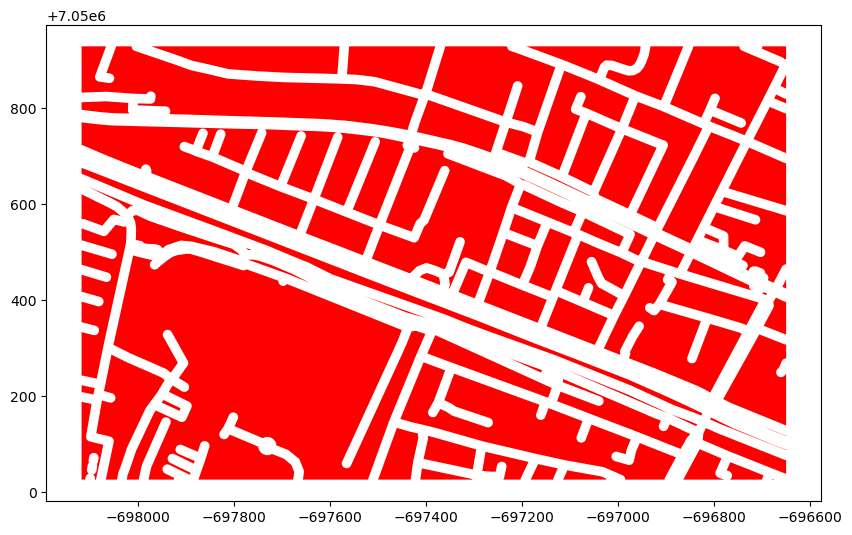

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
#ways_clip.plot(ax=ax, edgecolor='pink')

print(ways_poly)

print(ways_poly.loc[ways_poly.geometry.type=='MultiPolygon'])

ways_poly.loc[ways_poly.geometry.type=='MultiPolygon'].plot(ax=ax, facecolor='red')
plt.show()

ways_poly.loc[ways_poly.geometry.type=='MultiPolygon'].to_file("polygons/whitworth_3km_road_buffers.geojson")

POINT (46.333333333333336 55)
[({'type': 'Polygon', 'coordinates': [[(99.0, 10.0), (100.0, 10.0), (100.0, 13.0), (99.0, 13.0), (99.0, 18.0), (98.0, 18.0), (98.0, 23.0), (97.0, 23.0), (97.0, 28.0), (96.0, 28.0), (96.0, 33.0), (95.0, 33.0), (95.0, 38.0), (94.0, 38.0), (94.0, 43.0), (93.0, 43.0), (93.0, 48.0), (92.0, 48.0), (92.0, 53.0), (91.0, 53.0), (91.0, 58.0), (90.0, 58.0), (90.0, 63.0), (89.0, 63.0), (89.0, 68.0), (88.0, 68.0), (88.0, 73.0), (87.0, 73.0), (87.0, 78.0), (86.0, 78.0), (86.0, 83.0), (85.0, 83.0), (85.0, 85.0), (84.0, 85.0), (84.0, 86.0), (81.0, 86.0), (81.0, 87.0), (78.0, 87.0), (78.0, 88.0), (75.0, 88.0), (75.0, 89.0), (72.0, 89.0), (72.0, 90.0), (69.0, 90.0), (69.0, 91.0), (66.0, 91.0), (66.0, 92.0), (63.0, 92.0), (63.0, 93.0), (60.0, 93.0), (60.0, 94.0), (57.0, 94.0), (57.0, 95.0), (54.0, 95.0), (54.0, 96.0), (51.0, 96.0), (51.0, 97.0), (48.0, 97.0), (48.0, 98.0), (45.0, 98.0), (45.0, 99.0), (42.0, 99.0), (42.0, 100.0), (39.0, 100.0), (39.0, 101.0), (36.0, 101.0), (

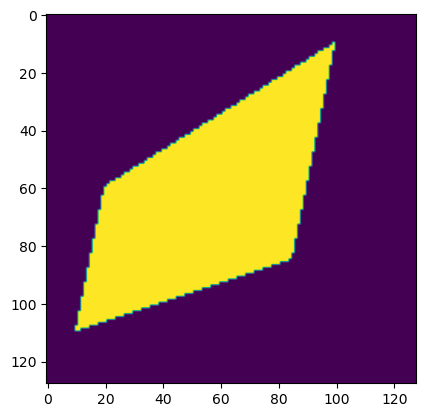

In [7]:
from shapely.geometry import Polygon, shape
from shapely import affinity
import rasterio.features
import matplotlib.pyplot as plt

poly = Polygon([(0, 100), (10, 50), (90, 0), (75, 75), (0, 100)])
print(poly.centroid)
poly = affinity.translate(poly, xoff=10, yoff=10)
img = rasterio.features.rasterize([poly], out_shape=(128, 128))
plt.imshow(img)

poly_shape = rasterio.features.shapes(img)
#poly_shape = {'geometry': list(poly_shape)[0]}

print(list(poly_shape))

Whitworth area: 0    1.324322
dtype: float64 km^2
Expanded area: 0    51.543871
dtype: float64 km^2


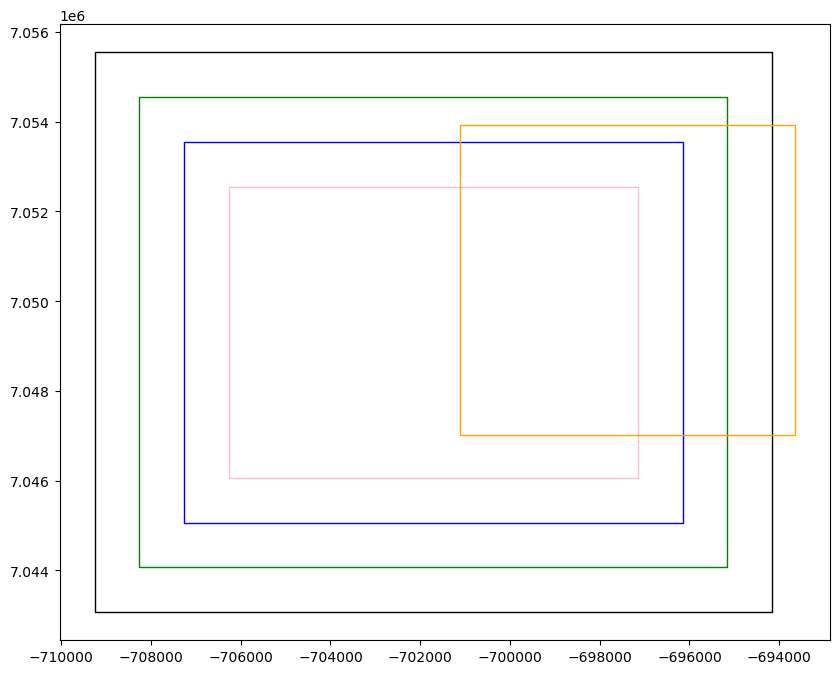

In [10]:
poly = gpd.read_file("polygons/dublin_box_max.geojson").to_crs(3857)
whit = gpd.read_file("polygons/whitworth.geojson").to_crs(3857)

fig, ax = plt.subplots(1,1,figsize=(10,8))
poly.plot(ax=ax, edgecolor='black', facecolor='none')
#cx.add_basemap(ax, crs='EPSG:3857', attribution=False, source=cx.providers.CartoDB.Voyager)

buffer_1km = poly.buffer(-1000,join_style=2)
buffer_2km = poly.buffer(-2000,join_style=2)
buffer_3km = poly.buffer(-3000,join_style=2)

buffer_1km.plot(ax=ax, edgecolor='green', facecolor='none')
buffer_2km.plot(ax=ax, edgecolor='blue', facecolor='none')
buffer_3km.plot(ax=ax, edgecolor='pink', facecolor='none')
whit.buffer(3000,join_style=2).plot(ax=ax, edgecolor='orange', facecolor='none')

whit_3km = whit.buffer(3000,join_style=2)

print("Whitworth area:", whit.area / 1000000, "km^2")
print("Expanded area:", whit_3km.area / 1000000, "km^2")

EPSG:4326


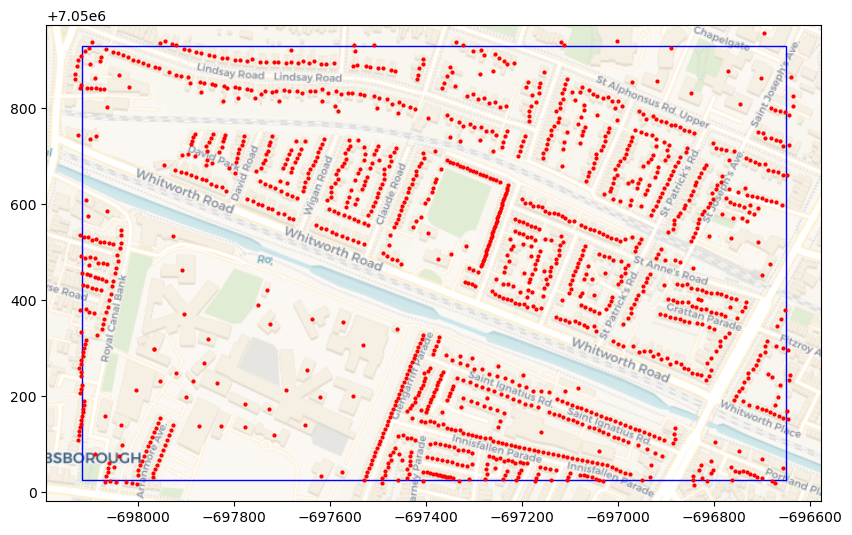

In [40]:
poly = gpd.read_file("polygons/whitworth.geojson")

print(poly.crs)
north = poly.total_bounds[3]
south = poly.total_bounds[1]
east = poly.total_bounds[2]
west = poly.total_bounds[0]

tags = {"building" : True}
buildings = ox.features_from_bbox(north, south, east, west, tags).to_crs(3857)
buildings = buildings.loc[buildings.geometry.type=='Polygon']
building_points = buildings.copy().reset_index(drop=False)[['osmid','name','addr:street','addr:city', 'addr:county', 'addr:county', 'amenity', 'geometry']]
building_points['geometry'] = building_points.apply(lambda row : row.geometry.centroid, axis=1)

fig, ax = plt.subplots(1,1,figsize=(10,8))
poly.to_crs(3857).plot(ax=ax, facecolor='none', edgecolor='blue')
cx.add_basemap(ax, crs='EPSG:3857', attribution=False, source=cx.providers.CartoDB.Voyager)
building_points.plot(ax=ax, color='red', markersize=4)
plt.show()

In [ ]:
def ways_buffering(buffer_size):
    poly_centre = gpd.read_file("polygons/whitworth.geojson").to_crs(3857).centroid

    start_time = time.time()

    poly = gpd.GeoDataFrame(geometry=poly_centre.buffer(buffer_size,join_style=2,cap_style=3)).to_crs(4326)

    north = poly.total_bounds[3]
    south = poly.total_bounds[1]
    east = poly.total_bounds[2]
    west = poly.total_bounds[0]

    tags = {"highway" : True, "railway" : True, "waterway" : True}
    ways = ox.features_from_bbox(north, south, east, west, tags)
    ways = ways.loc[ways.geometry.type=='LineString']
    ways = ways.loc[ways.highway!="footway"]


    poly = poly.to_crs(3857)
    ways = ways.to_crs(3857)

    ways_clip = gpd.clip(ways, poly)

    ways_buffer = gpd.GeoDataFrame(geometry=ways_clip.buffer(10))

    ways_poly = poly.overlay(ways_buffer, how='symmetric_difference')
    ways_poly = gpd.clip(ways_poly, poly)

    ways_poly = ways_poly.loc[ways_poly.geometry.type=='MultiPolygon']

    end_time = time.time()
    generation_time = end_time - start_time
    #print(f"generation time = {generation_time:.3f} seconds")

    fig, ax = plt.subplots(1,2,figsize=(12,6))
    ways_clip.plot(ax=ax[0])
    ways_poly.plot(ax=ax[1], facecolor='red')
    plt.savefig(f"plots/whit_buffers_{buffer_size}m.png")
    plt.close()
    return generation_time

def building_nodes(buffer_size=500):
    poly_centre = gpd.read_file("polygons/whitworth.geojson").to_crs(3857).centroid

    start_time = time.time()

    poly = gpd.GeoDataFrame(geometry=poly_centre.buffer(buffer_size,join_style=2,cap_style=3)).to_crs(4326)

    north = poly.total_bounds[3]
    south = poly.total_bounds[1]
    east = poly.total_bounds[2]
    west = poly.total_bounds[0]

    tags = {"building" : True}
    buildings = ox.features_from_bbox(north, south, east, west, tags)
    #buildings = buildings.loc[ways.geometry.type=='Point']
    

    poly = poly.to_crs(3857)
    buildings = buildings.to_crs(3857)

    buildings_clip = gpd.clip(buildings, poly)

    end_time = time.time()
    generation_time = end_time - start_time
    print(f"generation time = {generation_time:.3f} seconds")

    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ways_clip.plot(ax=ax)